In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)

y = np.hstack([y,-y])
x = np.hstack([x,-x])

x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

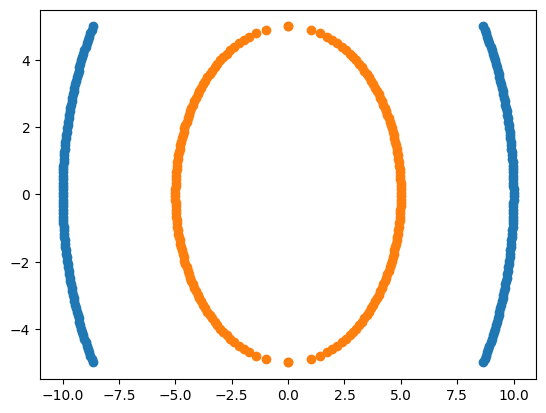

In [90]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [91]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1,df2],ignore_index=True)
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1


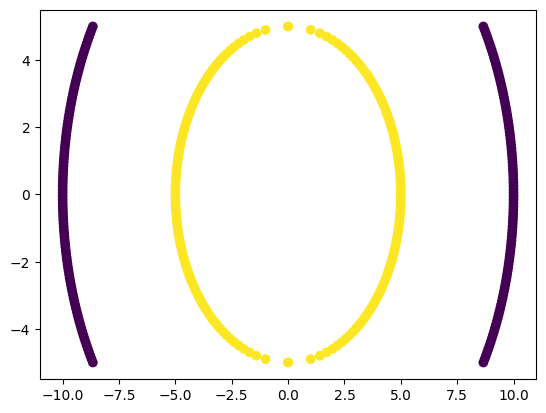

In [92]:
plt.scatter(data=df,x='X1',y='X2',c=df['Y'])

In [93]:
X = df.iloc[:,:2]
Y = df.iloc[:,-1]
print(X.shape,Y.shape)

(400, 2) (400,)


In [94]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=43)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(320, 2) (80, 2) (320,) (80,)


## Linear Kernal

In [95]:
classifier_linear = SVC(kernel='linear')
classifier_linear.fit(x_train,y_train)
y_pred = classifier_linear.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[35  0]
 [45  0]]
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        35
           1       0.00      0.00      0.00        45

    accuracy                           0.44        80
   macro avg       0.22      0.50      0.30        80
weighted avg       0.19      0.44      0.27        80



p:\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

p:\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

p:\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Accuracy score : 44%

### Polynomial Kernal

In [96]:
classifier_poly= SVC(kernel='poly',degree=2)
classifier_poly.fit(x_train,y_train)
y_pred = classifier_poly.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[35  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        45

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### Accuracy score : 100%

### Manually creating Polynomial Degreee

In [97]:
df['X1_sqr'] = df['X1']**2
df['X2_sqr'] = df['X2']**2
df['X1*X2']  = (df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_sqr,X2_sqr,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [98]:
px.scatter_3d(data_frame=df,x=df['X1'],y=df['X2'],z=df['X1*X2'],color=df['Y'])

In [99]:
px.scatter_3d(data_frame=df,x=df['X1_sqr'],y=df['X2_sqr'],z=df['X1*X2'],color=df['Y'])

### Preprocessing for training the model

In [100]:
X = df.drop('Y',axis=1)
Y = df['Y']
print(X.shape,Y.shape)


(400, 5) (400,)


In [101]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=43)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(320, 5) (80, 5) (320,) (80,)


### Linear SVC on top of manually created Polynomial degree

In [102]:
classifier_linear = SVC(kernel='linear')
classifier_linear.fit(x_train,y_train)
y_pred = classifier_linear.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[35  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        45

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### Accuracy Score : 100%

## Polynomial Kernal

In [103]:
classifier_poly = SVC(kernel='poly',degree=2)
classifier_poly.fit(x_train,y_train)
y_pred = classifier_poly.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[35  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        45

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# RBF kernal

In [105]:
classifier_rbf = SVC(kernel='rbf')
classifier_rbf.fit(x_train,y_train)
y_pred = classifier_rbf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[35  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        45

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### Accuracy score : 100%